In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import math


sns.set_theme(style="ticks", color_codes=True)
sns.set(style="ticks",font_scale=1.2)
#sns.set()  # crazy big
colors = ["#E59866", "#D35400", "#873600", "#85C1E9", "#3498DB", "#2874A6"]
pal=sns.color_palette(colors)
mart=['o','o','o']
marr=['v','v','v']
lin=dashes=[(3, 0), (3, 0), (3, 0)]
lin2=dashes=[(3, 1), (3, 1), (3, 1)]



methods=["cfear-1", "cfear-2", "cfear-3"]
datasets=["Oxford", "Mulran"]
dfs=[]
for dataset in datasets:
    for method in methods:
        
        path="./data/concatinated_"+dataset.lower()+"_"+method+".csv"
        print(dataset + " " + method + path)
        df = pd.read_csv(path, sep=r' ', header=0)
        df.loc[:,'configuration'] = method
        df.loc[:,'dataset'] = dataset
        dfs.append(df)
        #print(df)
dft = pd.concat(dfs)     
print(dft)
#print(df)
dft = dft.rename(columns={'Trans.err.(%)': 'Transl. Error [%]'})
dft = dft.rename(columns={'length': 'Path Length'})
dft = dft.rename(columns={'Rot.err.(deg/100m)': 'Rot. Error [deg/100m]'})
dft['Transl. Error [%]'] = dft['Transl. Error [%]']*100
dft['Rot. Error [deg/100m]'] = dft['Rot. Error [deg/100m]']*100*180/math.pi

Oxford cfear-1./data/concatinated_oxford_cfear-1.csv
Oxford cfear-2./data/concatinated_oxford_cfear-2.csv
Oxford cfear-3./data/concatinated_oxford_cfear-3.csv
Mulran cfear-1./data/concatinated_mulran_cfear-1.csv
Mulran cfear-2./data/concatinated_mulran_cfear-2.csv
Mulran cfear-3./data/concatinated_mulran_cfear-3.csv
       index  Rot.err.(deg/100m)  Trans.err.(%)  length      speed  \
0          0            0.000012       0.016437     100   5.376344   
1          0            0.000068       0.009665     200   8.000000   
2          0            0.000025       0.011694     300   9.868421   
3          0            0.000080       0.005882     400  11.428571   
4          0            0.000075       0.002067     500  12.077295   
...      ...                 ...            ...     ...        ...   
20382   4000            0.000394       0.015272     100  14.285714   
20383   4010            0.000347       0.039788     100  12.987013   
20384   4020            0.000047       0.016839     

Oxford


/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()
/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Mulran


/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()
/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


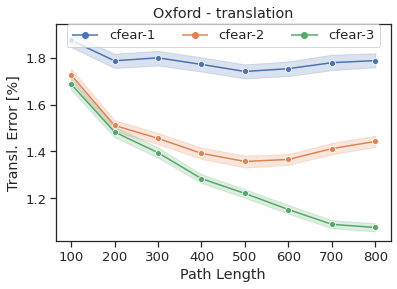

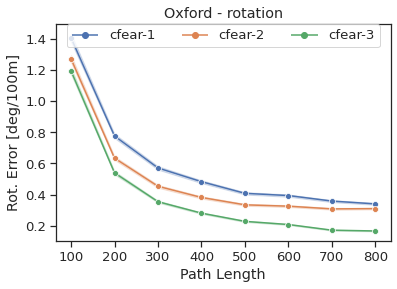

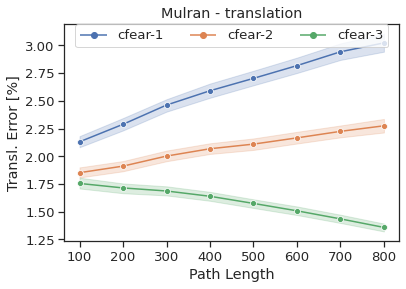

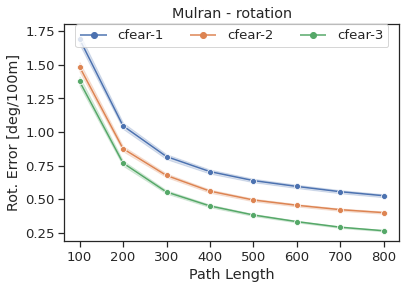

In [6]:
i = 0
for dataset in datasets:
    fig=plt.figure(i)
    
    print(dataset)
    dft_dataset=dft[dft["dataset"]==dataset]
    #fig, ax1 = plt.subplots(figsize=(6,4))
    sns.lineplot(data=dft_dataset, x='Path Length', y="Transl. Error [%]", hue="configuration",markers=mart, dashes=lin,legend=True ,style="configuration").set(title=dataset + " - translation")
    
    plt.legend(loc='upper center', borderaxespad=0,ncol=3)
    fig.show() 
    
    fig.savefig('./output/PathError'+dataset+'Trans.pdf',bbox_inches = 'tight', format='pdf')
    fig.savefig('./output/PathError'+dataset+'Trans.png',bbox_inches = 'tight', format='png', dpi=300)
    
    fig=plt.figure(i+1)

    sns.lineplot(data=dft_dataset, x='Path Length', y="Rot. Error [deg/100m]", hue="configuration",markers=mart, dashes=lin,legend=True ,style="configuration").set(title=dataset + " - rotation")
    plt.legend(loc='upper center', borderaxespad=0,ncol=3)
    fig.show()
    fig.savefig('./output/PathError'+dataset+'Rot.pdf',bbox_inches = 'tight', format='pdf')
    fig.savefig('./output/PathError'+dataset+'Rot.png',bbox_inches = 'tight', format='png', dpi=300)
    i=i+2


